# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\keraspy36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\keraspy36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\keraspy36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\keras

170500096/170498071 [==============================] - 28s 0us/step


### 2. Visualize the First 24 Training Images

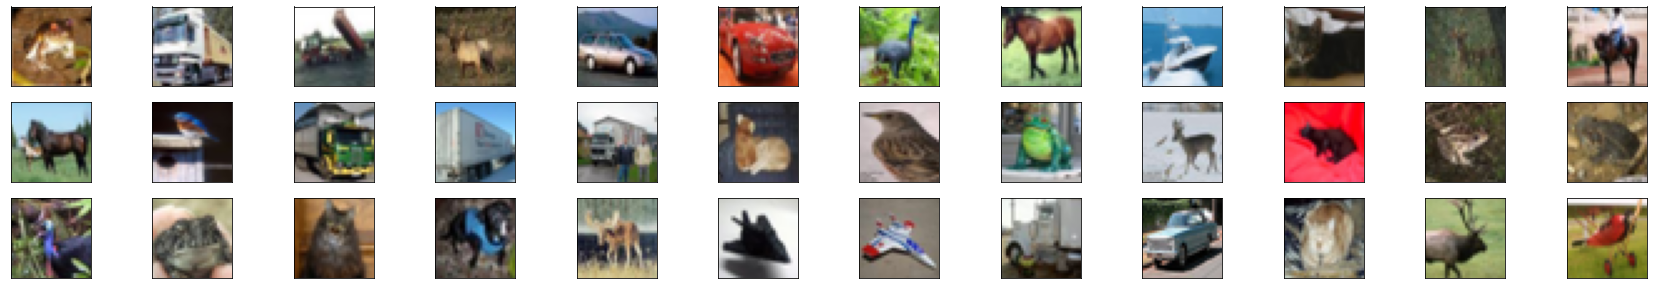

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(30,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### My Added Code

Image Size: (32, 32, 3)


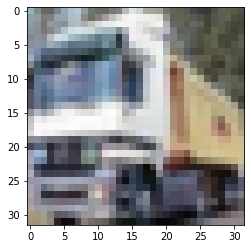

In [15]:
import matplotlib.image as mpimg
plt.imshow(x_train[1])
print('Image Size:',x_train[1].shape)

In [20]:
len(np.unique(y_train))

10

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [16]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [21]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
____________________________________________

### 6. Compile the Model 

In [24]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [25]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)


Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 14s - loss: 2.0653 - accuracy: 0.2712 - val_loss: 1.8135 - val_accuracy: 0.3502

Epoch 00001: val_loss improved from inf to 1.81348, saving model to MLP.weights.best.hdf5
Epoch 2/20
 - 12s - loss: 1.8555 - accuracy: 0.3275 - val_loss: 1.8095 - val_accuracy: 0.3368

Epoch 00002: val_loss improved from 1.81348 to 1.80946, saving model to MLP.weights.best.hdf5
Epoch 3/20
 - 12s - loss: 1.8142 - accuracy: 0.3491 - val_loss: 1.7582 - val_accuracy: 0.3548

Epoch 00003: val_loss improved from 1.80946 to 1.75818, saving model to MLP.weights.best.hdf5
Epoch 4/20
 - 12s - loss: 1.7871 - accuracy: 0.3593 - val_loss: 1.7902 - val_accuracy: 0.3438

Epoch 00004: val_loss did not improve from 1.75818
Epoch 5/20
 - 12s - loss: 1.7758 - accuracy: 0.3632 - val_loss: 1.7386 - val_accuracy: 0.3638

Epoch 00005: val_loss improved from 1.75818 to 1.73862, saving model to MLP.weights.best.hdf5
Epoch 6/20
 - 12s - loss: 1.7651 - accuracy: 0.3708 

### 8. Load the Model with the Best Classification Accuracy on the Validation Set

In [27]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [28]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.40119999647140503
